In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
data = pd.read_csv("week2.csv")

In [52]:
data["Date"].dtypes

dtype('O')

In [53]:
data["Date"]= pd.to_datetime(data["Date"]) 

In [54]:
data.set_index("Date", inplace = True) 

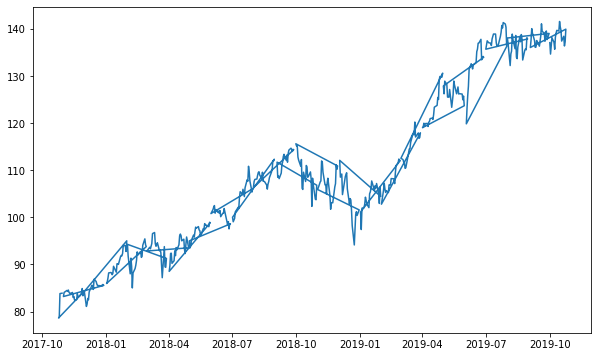

In [55]:
plt.figure(figsize=(10,6))
plt.plot(data["Close Price"])

C:\Users\mayank\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x432 with 0 Axes>

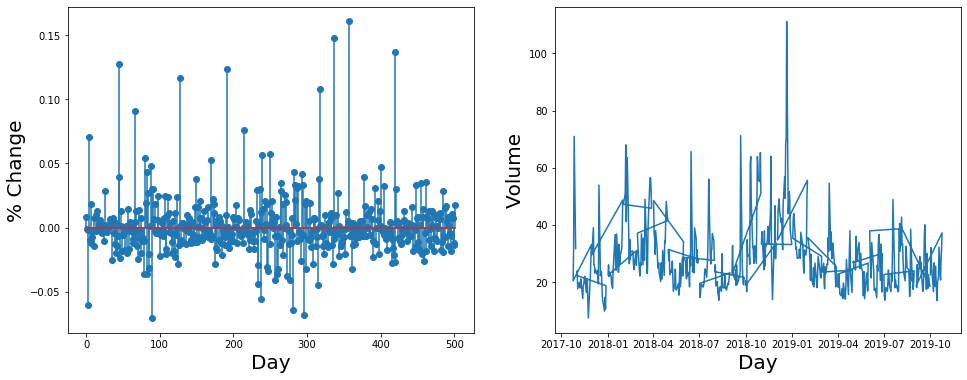

In [56]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 2, figsize=(16,6), squeeze=False)
ax[0][0].stem(data["Day_Perc_Change"])
ax[0][0].set_xlabel("Day", fontsize=20)
ax[0][0].set_ylabel("% Change", fontsize=20)
ax[0][1].plot(data["Volume"])
ax[0][1].set_xlabel("Day", fontsize=20)
ax[0][1].set_ylabel("Volume", fontsize=20)
plt.show()

The comparison of above graphs show that the whenever there is a big rise in the close price, that day the volume of trade also goes higher. As more people trade in that stock, for that particular today the close price increases.

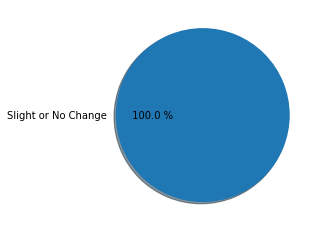

In [57]:
plt.pie(data.groupby(["Trend"]).size(), labels = {"Slight or No Change"}, autopct ='% 1.1f %%', shadow = True)
plt.show()

In [58]:
def avg_trend(df):
    vol = df["Volume"].values
    avg = np.average(vol)
    return avg

def median_trend(df):
    vol = df["Volume"].values
    med = np.median(vol)
    return med

grouped = data.groupby(["Trend"]).apply(avg_trend)
keys = grouped.keys()

<BarContainer object of 9 artists>

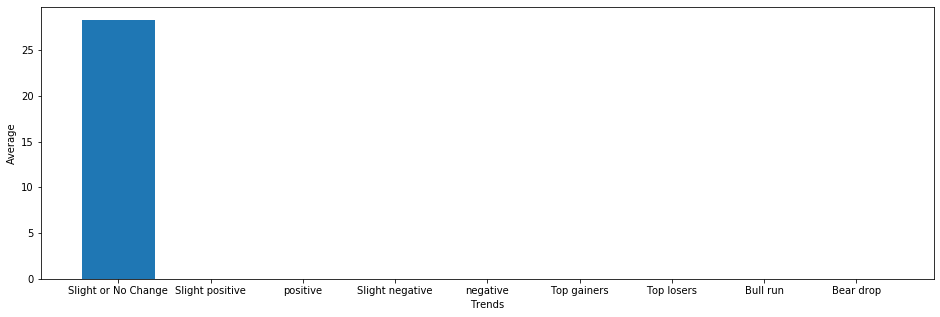

In [59]:
bar_plot_avg = {}
i = 0
for key in keys:
    bar_plot_avg[key] = grouped[i]
    i = i + 1
    
bar_plot_avg["Slight positive"]  = 0
bar_plot_avg["positive"] = 0
bar_plot_avg["Slight negative"] = 0
bar_plot_avg["negative"] = 0
bar_plot_avg["Top gainers"] = 0
bar_plot_avg["Top losers"] = 0
bar_plot_avg["Bull run"] = 0
bar_plot_avg["Bear drop"] = 0
trends = list(bar_plot_avg.keys()) 
values = list(bar_plot_avg.values()) 
plt.figure(figsize = (16, 5)) 
plt.xlabel('Trends')
plt.ylabel('Average')
plt.bar(trends, values)

<BarContainer object of 9 artists>

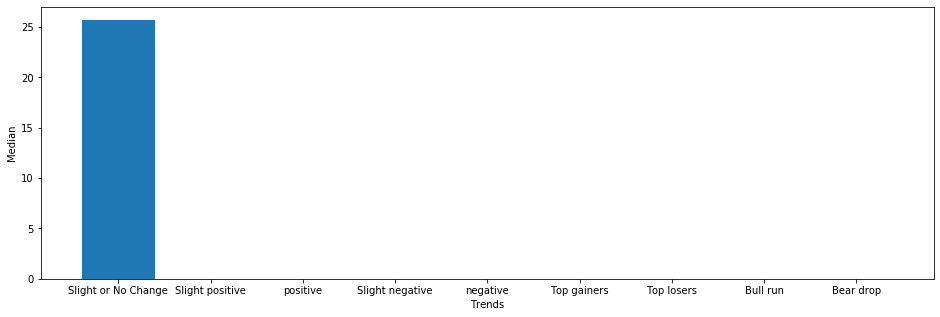

In [60]:
grouped_med = data.groupby(["Trend"]).apply(median_trend)
keys = grouped_med.keys()
bar_plot_median = {}
i = 0
for key in keys:
    bar_plot_median[key] = grouped_med[i]
    i = i + 1
    
bar_plot_median["Slight positive"]  = 0
bar_plot_median["positive"] = 0
bar_plot_median["Slight negative"] = 0
bar_plot_median["negative"] = 0
bar_plot_median["Top gainers"] = 0
bar_plot_median["Top losers"] = 0
bar_plot_median["Bull run"] = 0
bar_plot_median["Bear drop"] = 0
trends = list(bar_plot_median.keys()) 
values = list(bar_plot_median.values()) 
plt.figure(figsize = (16, 5)) 
plt.xlabel('Trends')
plt.ylabel('Median')
plt.bar(trends, values)

(array([  5.,  25., 223., 201.,  32.,   6.,   3.,   1.,   4.,   2.]),
 array([-0.07037748, -0.04728179, -0.0241861 , -0.00109042,  0.02200527,
         0.04510096,  0.06819665,  0.09129234,  0.11438802,  0.13748371,
         0.1605794 ]),
 <a list of 10 Patch objects>)

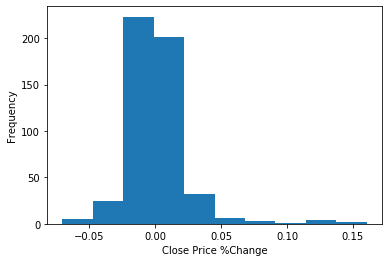

In [61]:
plt.xlabel("Close Price %Change")
plt.ylabel("Frequency")
plt.hist(data["Day_Perc_Change"])

In [62]:
df_1 = pd.read_csv("Mid_Cap/APOLLOTYRE.csv")
df_2 = pd.read_csv("Mid_Cap/BERGEPAINT.csv")
df_3 = pd.read_csv("Mid_Cap/CASTROLIND.csv")
df_4 = pd.read_csv("Mid_Cap/DHFL.csv")
df_5 = pd.read_csv("Mid_Cap/IDBI.csv")

In [63]:
df_1 = df_1[df_1["Series"] == "EQ"]
df_2 = df_2[df_2["Series"] == "EQ"]
df_3 = df_3[df_3["Series"] == "EQ"]
df_4 = df_4[df_4["Series"] == "EQ"]
df_5 = df_5[df_5["Series"] == "EQ"]

In [64]:
df = pd.DataFrame({
      "APOLLOTYRE":df_1["Close Price"], 
      "BERGEPAINT":df_2["Close Price"],
      "CASTROLIND":df_3["Close Price"],
      "DHFL":df_4["Close Price"],
      "IDBI":df_5["Close Price"]
     })

In [65]:
df_pct_change = df.pct_change()

In [66]:
df_pct_change.dropna(inplace=True)

In [67]:
df_pct_change.corr()

,APOLLOTYRE,BERGEPAINT,CASTROLIND,DHFL,IDBI
APOLLOTYRE,1.000000,0.360162,0.005268,0.008970,0.228124
BERGEPAINT,0.360162,1.000000,-0.006400,-0.009239,0.200316
CASTROLIND,0.005268,-0.006400,1.000000,0.012590,0.045246
DHFL,0.008970,-0.009239,0.012590,1.000000,-0.005672
IDBI,0.228124,0.200316,0.045246,-0.005672,1.000000


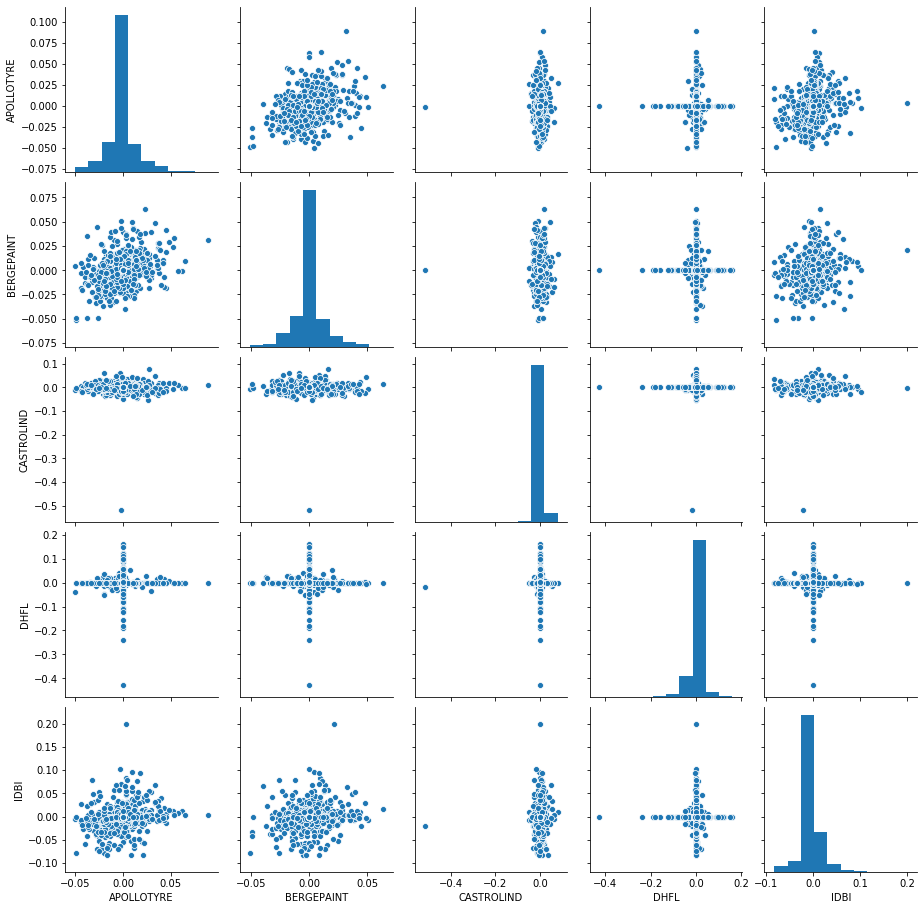

In [68]:
sns.pairplot(df_pct_change)

In [69]:
roll_pct_change = df_pct_change["APOLLOTYRE"].rolling(7).sum()
roll_pct_change.std()

0.03458524463406999

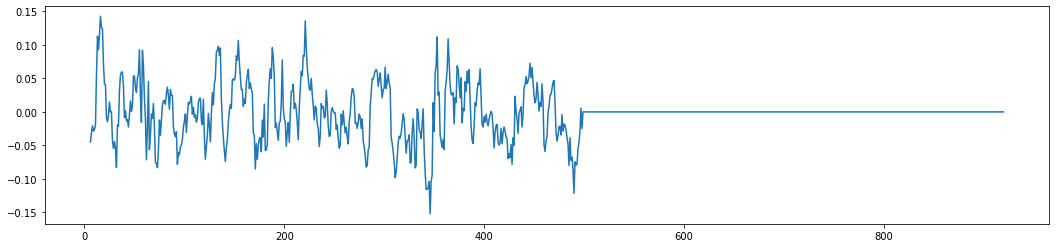

In [70]:
plt.figure(figsize=(18, 4))
#plot only 921 values to get better view of the changes. Changes after 921 is 0
plt.plot(list(range(0, 921)), roll_pct_change)

In [71]:
nifty = pd.read_csv("Nifty50/Nifty50.csv")

In [72]:
nifty_change = nifty["Close"].rolling(7).sum()
nifty_change.std()

3879.5662187009702

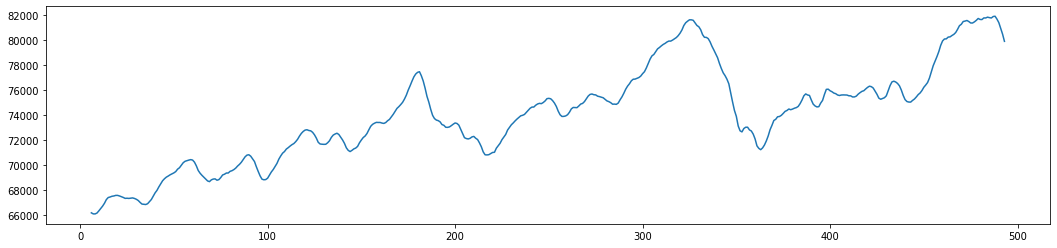

In [73]:
plt.figure(figsize=(18, 4))
plt.plot(nifty_change)

In [74]:
nifty_21 = nifty["Close"].rolling(21).sum()
nifty_34 = nifty["Close"].rolling(34).sum()

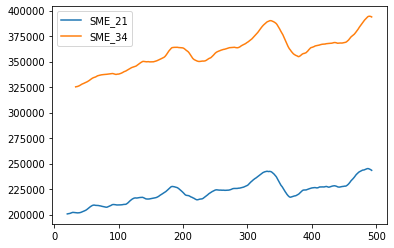

In [75]:
plt.plot(nifty_21, label="SME_21")
plt.plot(nifty_34, label="SME_34")
plt.legend(loc="best")

In [76]:
#Bollinger Bands
SME20 = nifty["Close"].rolling(14).sum()
std = SME20.std()
BOLU = SME20 + 2*std
BOLD = SME20 - 2*std
TP = (nifty["High"] + nifty["Low"] + nifty["Close"]) / 3

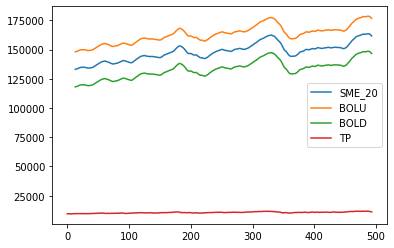

In [79]:
plt.plot(SME20, label="SME_20")
plt.plot(BOLU, label="BOLU")
plt.plot(BOLD, label="BOLD")
plt.plot(TP, label="TP")
plt.legend(loc="best")

In [80]:
data["SME20"] = data["Close Price"].rolling(14).sum()
std = data["SME20"].std()
data["BOLU"] = data["SME20"] + 2*std
data["BOLD"] = data["SME20"] - 2*std
data["TP"] = (data["High Price"] + data["Low Price"] + data["Close Price"]) / 3

In [81]:
data.dropna(axis=0, inplace=True)

In [82]:
data.head()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,Volume,VWAP,Day_Perc_Change,Trend,Avg_Trend,Median_Trend,SME20,BOLU,BOLD,TP
Date,,,,,,,,,,,,,,,,,
2017-11-16,83.20,83.10,83.42,82.94,20.96M,11,2017,20.9,83.515860,0.009709,Slight or No Change,28.28247,25.7,1159.57,1627.865509,691.274491,83.186667
2017-11-15,82.98,83.47,83.69,82.69,19.38M,11,2017,19.3,83.470500,-0.002644,Slight or No Change,28.28247,25.7,1158.66,1626.955509,690.364491,83.120000
2017-11-14,84.05,83.50,84.10,82.98,18.80M,11,2017,18.8,83.514643,0.012895,Slight or No Change,28.28247,25.7,1158.90,1627.195509,690.604491,83.710000
2017-11-13,83.93,83.66,83.94,83.46,14.20M,11,2017,14.2,83.537241,-0.001428,Slight or No Change,28.28247,25.7,1164.07,1632.365509,695.774491,83.776667
2017-11-10,83.87,83.79,84.09,83.23,19.40M,11,2017,19.4,83.560264,-0.000715,Slight or No Change,28.28247,25.7,1169.31,1637.605509,701.014491,83.730000


In [83]:
data.shape

(489, 17)

In [84]:
data.to_csv("week3.csv", index=True)